In [1]:
import matplotlib
#matplotlib.use('Agg')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4
from glob import glob
import os
import sys
sys.path.append('/cnrm/pastel/USERS/lecestres/analyse/')
from function_read import *

In [3]:
### EXPERIENCE NAME
expname = "ocean_reanalysis_GREP"
#expname = "sst_retroprevision_sys7"

### PERCENTILE THRESHOLD
percent_thresh = 95
#percent_thresh = 90

### MINIMAL DURATION OF A HW
duration_min = 5
#duration_min = 3

### REGION OF EXPERIENCE
reg_name = "global"
#reg_name = 'lat50_70-lon-40_-20'
#reg_name = 'lat-20_30-lon-30_10'
if reg_name == 'global':
    lats_bnds = [-90,90]
    lons_bnds = [-180,180]    
elif reg_name == 'lat50_70-lon-40_-20':
    lats_bnds = [50,70]
    lons_bnds = [-40, -20]
elif reg_name == 'lat-20_30-lon-30_10':
    lats_bnds = [-20, 30]
    lons_bnds = [-30, 10]
nlat = lats_bnds[1]-lats_bnds[0]
nlon = lons_bnds[1]-lons_bnds[0]

### YEARS
if expname == 'ocean_reanalysis_GREP':
    end_year=2016
    start_year=1993
elif expname == 'sst_retroprevision_sys7':
    end_year=2016
    start_year=1993
nyear=end_year-start_year+1

### SEASON
#season = "NDJFMAM"
season = "DJF"
if season == 'NDJFMAM':
    nday = 211
    season_start_day = [11,1] #1stNov
    season_end_day = [5,31] #31stMay
    first_day = 0
    
elif season == 'DJF':
    nday = 90
    season_start_day = [12,1] #1stDec
    season_end_day = [3,1] #1stMarch
    first_day = 30
    
ndayseas = nday//duration_min +1

if expname == "ocean_reanalysis_GREP":
    ### NAME OF VARIABLE IN THE NC FILE
    varname = 'thetao_mean'
    
    ### NUMBER OF MEMBS
    first_memb = 0
    last_memb = 1
    nmemb = last_memb-first_memb
    
    ### CROSS VALIDATION
    cv = True
    if cv:
        cv_str = "CV"
    else:
        cv_str = 'notCV'
        
elif expname == "sst_retroprevision_sys7":
    ### NAME OF VARIABLE IN THE NC FILE
    varname = 'sst'
    
    ### NUMBER OF MEMBS
    first_memb = 0
    last_memb = 5
    nmemb = last_memb-first_memb
    
    ### CROSS VALIDATION
    cv = True
    if cv:
        cv_str = "CV"
    else:
        cv_str = 'notCV'

### PARAMETERS
# Will be initialized later in the export
# parameters_str = reg_name + "_" + season + "_" + cv_str + '_percent%i'%(percent_thresh) + '_daymin%i'%(duration_min) +  "ref%i-%i"%(start_year, end_year)

In [4]:
for j,jmemb in enumerate(range(first_memb, last_memb)):
    memb_str='memb'+str(jmemb)
    parameters_str = reg_name+"_"+season+"_"+cv_str+'_percent%i'%(percent_thresh)+'_daymin%i'%(duration_min)+"_ref%i-%i"%(start_year, end_year)+'_'+memb_str
    pathHWs = '/cnrm/pastel/USERS/lecestres/NO_SAVE/data/'+expname+'/'+memb_str+'/'+season+'/Ampli_Fields_'+parameters_str+'/'
    #pathPlots = '/cnrm/pastel/USERS/lecestres/NO_SAVE/plots/'+expname+'/'+memb_str+'/'+season+'/'
    #if not(os.path.isdir(pathPlots)):
    #    os.makedirs(pathPlots)
    files = glob(pathHWs + '*.nc')
    files.sort()


In [5]:
files

['/cnrm/pastel/USERS/lecestres/NO_SAVE/data/ocean_reanalysis_GREP/memb0/DJF/Ampli_Fields_global_DJF_CV_percent95_daymin5_ref1993-2016_memb0/Ampli_Fields_global_DJF_CV_percent95_daymin5_ref1993-2016_memb0_1993_1994.nc',
 '/cnrm/pastel/USERS/lecestres/NO_SAVE/data/ocean_reanalysis_GREP/memb0/DJF/Ampli_Fields_global_DJF_CV_percent95_daymin5_ref1993-2016_memb0/Ampli_Fields_global_DJF_CV_percent95_daymin5_ref1993-2016_memb0_1994_1995.nc',
 '/cnrm/pastel/USERS/lecestres/NO_SAVE/data/ocean_reanalysis_GREP/memb0/DJF/Ampli_Fields_global_DJF_CV_percent95_daymin5_ref1993-2016_memb0/Ampli_Fields_global_DJF_CV_percent95_daymin5_ref1993-2016_memb0_1995_1996.nc',
 '/cnrm/pastel/USERS/lecestres/NO_SAVE/data/ocean_reanalysis_GREP/memb0/DJF/Ampli_Fields_global_DJF_CV_percent95_daymin5_ref1993-2016_memb0/Ampli_Fields_global_DJF_CV_percent95_daymin5_ref1993-2016_memb0_1996_1997.nc',
 '/cnrm/pastel/USERS/lecestres/NO_SAVE/data/ocean_reanalysis_GREP/memb0/DJF/Ampli_Fields_global_DJF_CV_percent95_daymin5_ref

In [6]:
for iyear,file in enumerate(files[:]):
    varf = netCDF4.Dataset(file)
    ampli = varf.variables['Ampli'][:]
    fields = varf.variables['Field'][:]
    lats_reg = varf.variables['lat'][:]
    lons_reg = varf.variables['lon'][:]
    varf.close()
    print(ampli.shape, fields.shape)

(627, 19) (627, 180, 360)
(746, 19) (746, 180, 360)
(716, 19) (716, 180, 360)
(746, 19) (746, 180, 360)
(720, 19) (720, 180, 360)
(695, 19) (695, 180, 360)
(711, 19) (711, 180, 360)
(836, 19) (836, 180, 360)
(883, 19) (883, 180, 360)
(1035, 19) (1035, 180, 360)
(993, 19) (993, 180, 360)
(984, 19) (984, 180, 360)
(1031, 19) (1031, 180, 360)
(1133, 19) (1133, 180, 360)
(932, 19) (932, 180, 360)
(976, 19) (976, 180, 360)
(976, 19) (976, 180, 360)
(771, 19) (771, 180, 360)
(973, 19) (973, 180, 360)
(1122, 19) (1122, 180, 360)
(1044, 19) (1044, 180, 360)
(1021, 19) (1021, 180, 360)
(976, 19) (976, 180, 360)
(1120, 19) (1120, 180, 360)


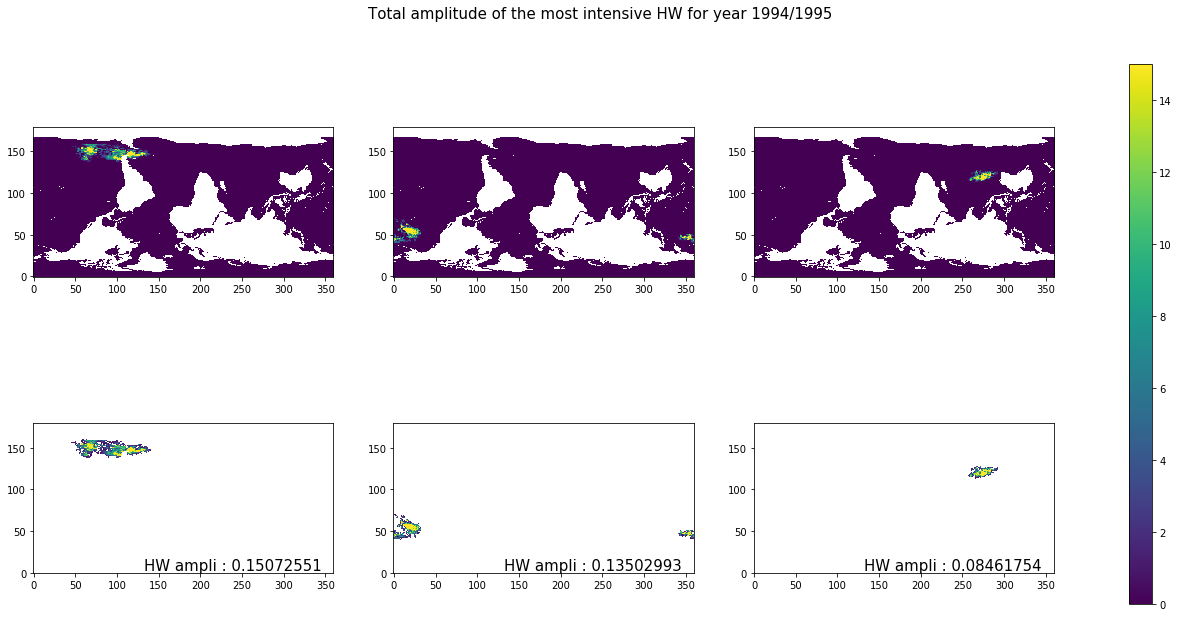

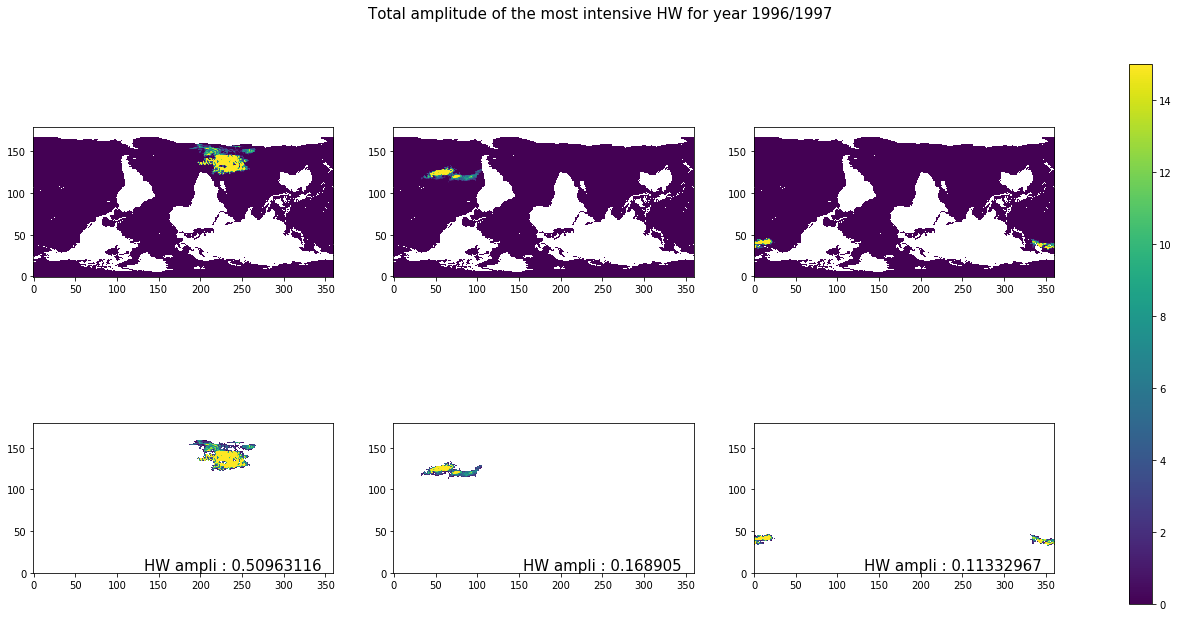

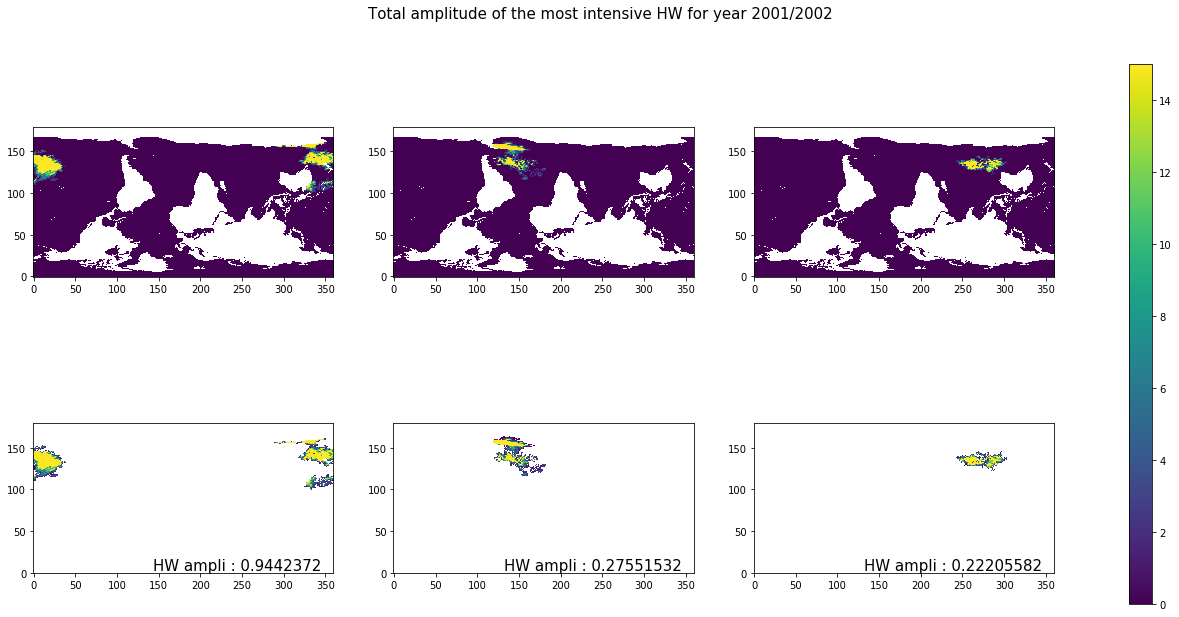

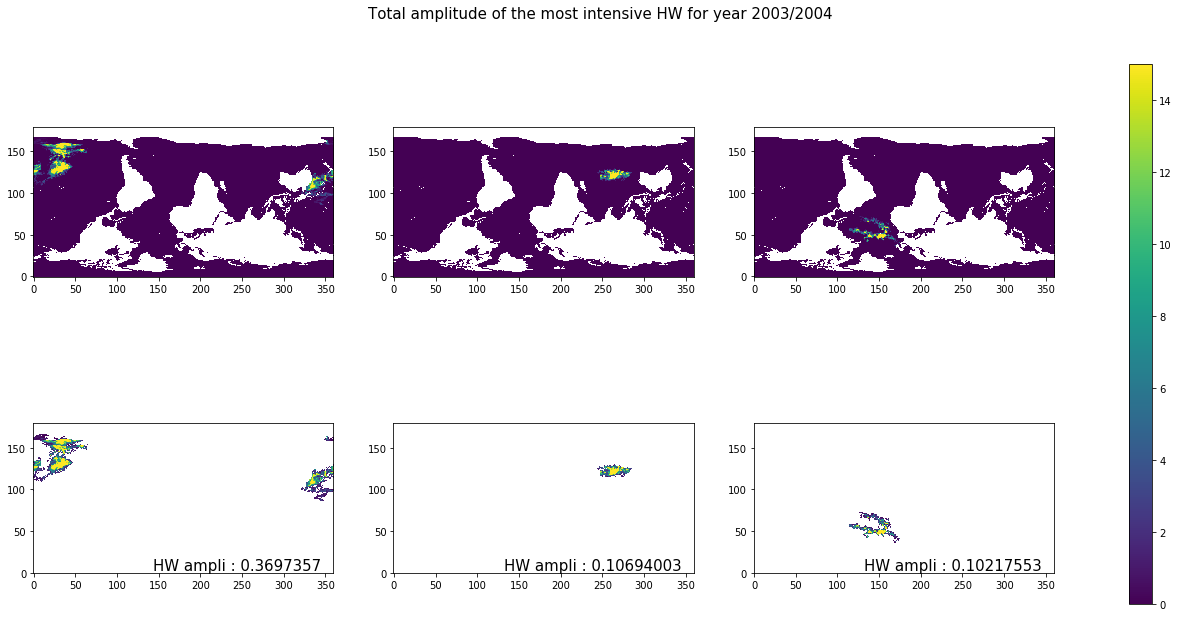

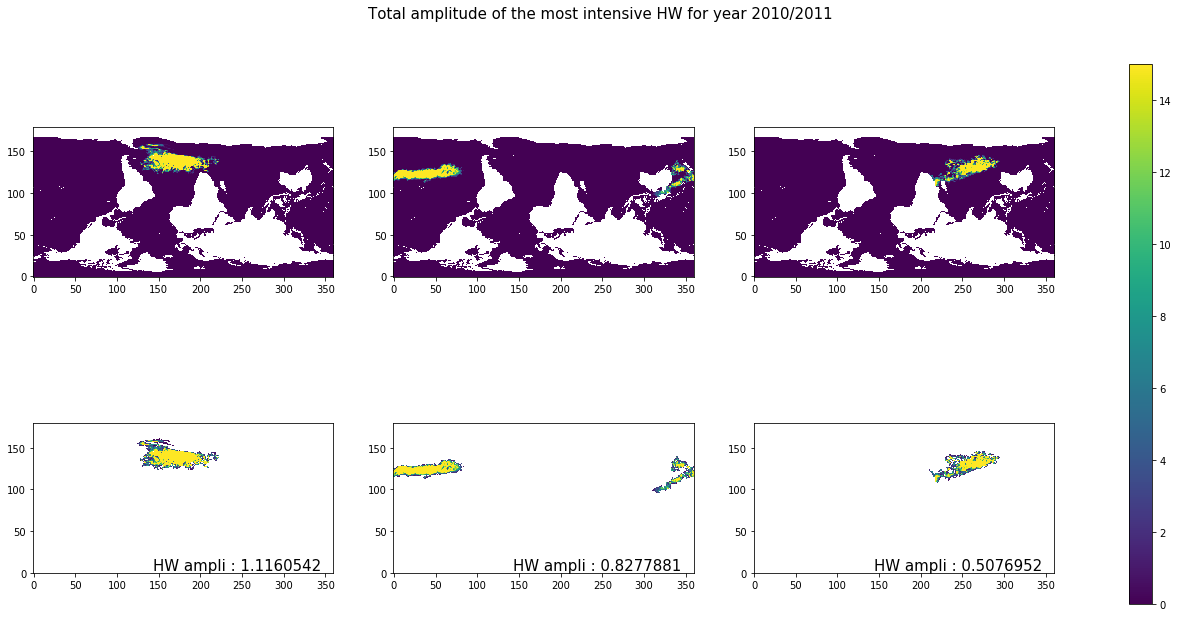

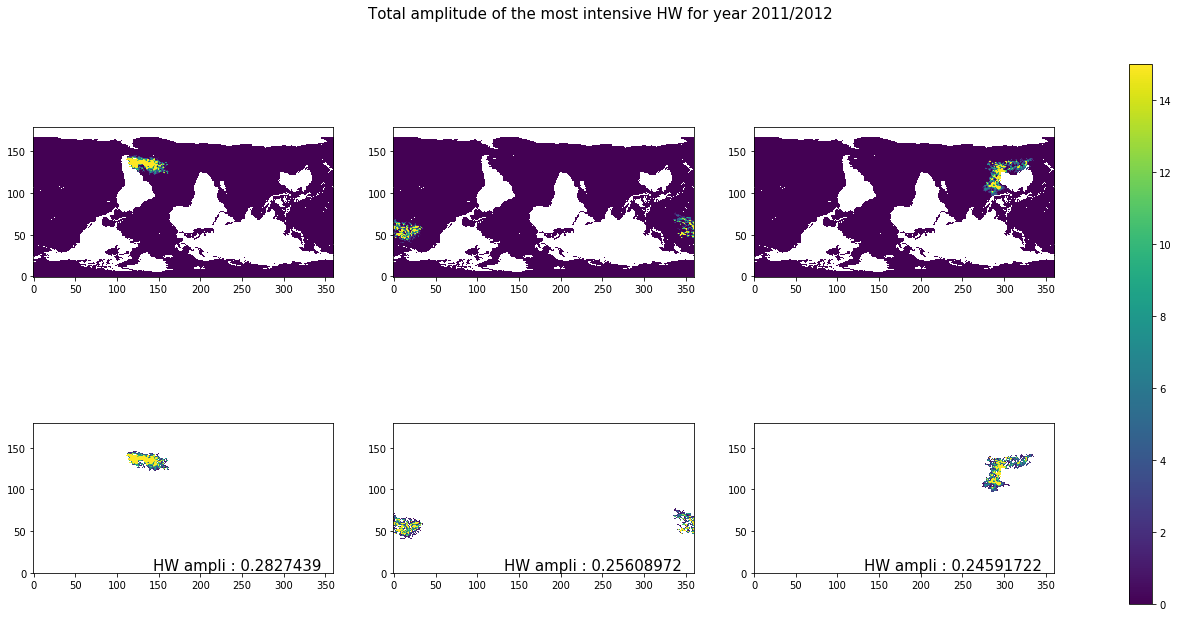

In [7]:
if expname == 'ocean_reanalysis_GREP':
    origin = 'lower'
elif expname == 'sst_retroprevision_sys7':
    origin = 'upper'
    
for iyear,file in enumerate(files[:]):
    varf = netCDF4.Dataset(file)
    ampli = varf.variables['Ampli'][:]
    fields = varf.variables['Field'][:]
    lats_reg = varf.variables['lat'][:]
    lons_reg = varf.variables['lon'][:]
    varf.close()
    nHW_i, ndayseas_i = ampli.shape
    if ndayseas != ndayseas_i:
        print('WARNING : ndayseas has been set to ', ndayseas,' but is equal to ', ndayseas_i)
    total_ampli = np.ma.sum(ampli, axis = 1)
    fieldssum = area_av(fields, 1,2, lats_reg, lons_reg)
    args_max_ampli = np.flip(np.argsort(total_ampli))
    args_max_field = np.flip(np.argsort(fieldssum))
    columns = 3
    if (args_max_ampli[:columns] == args_max_field[:columns]).all():
        fig, axes = plt.subplots(nrows = 2, ncols=columns, figsize=(21,10))
        plt.suptitle('Total amplitude of the most intensive HW for year %i/%i'%(start_year + iyear, start_year + 1 +iyear), fontsize = 15)
        for iHW in range(columns):
            im1_i = axes[0][iHW].imshow(fields[args_max_field[iHW], :,:], vmin=0, vmax=15, origin=origin)
            im2_i = axes[1][iHW].imshow(np.ma.array(fields[args_max_field[iHW], :,:], mask=(fields[args_max_field[iHW],:,:]==0)), vmin=0, vmax=15, origin=origin)
            axes[1][iHW].text(0.96, 0.05, 'HW ampli : ' + str(total_ampli[args_max_field[iHW]]), verticalalignment='center', horizontalalignment='right', transform = axes[1][iHW].transAxes, fontsize=15)
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.75])
        fig.colorbar(im2_i, cax=cbar_ax)
        #plt.savefig(pathPlots + 'MostIntensiveHWfield_' + parameters_str + '_%i-%i'%(start_year + iyear, start_year + 1 +iyear) + '.pdf')

In [8]:
#a = min(total_ampli), min(fieldssum)
#print(a)
#for i in range(total_ampli.shape[0]):
#    #print(total_ampli[i], fieldssum[i], total_ampli[i]-fieldssum[i], total_ampli[i]/fieldssum[i])
#    if np.abs((total_ampli[i]-fieldssum[i])/total_ampli[i])>1e-6:
#        print(total_ampli[i], fieldssum[i], total_ampli[i]-fieldssum[i], total_ampli[i]/fieldssum[i])
#    if np.abs(total_ampli[i]/fieldssum[i]-1) >1e-6:
#        print(total_ampli[i], fieldssum[i], total_ampli[i]-fieldssum[i], total_ampli[i]/fieldssum[i])

In [9]:
#for iyear,file in enumerate(files):
#    varf = netCDF4.Dataset(file)
#    ampli = varf.variables['Ampli'][:]
#    fields = varf.variables['Field'][:]
#    lats_reg = varf.variables['lat'][:]
#    lons_reg = varf.variables['lon'][:]
#    varf.close()
#    total_ampli = np.ma.sum(ampli, axis=1)
#    fieldssum = area_av(fields, 1,2, lats_reg, lons_reg)
#    args_max_ampli = np.flip(np.argsort(total_ampli))
#    args_max_field = np.flip(np.argsort(fieldssum))
#    print('first part')
#    for i in range(total_ampli.shape[0]):
#        #print(total_ampli[i], fieldssum[i], total_ampli[i]-fieldssum[i], total_ampli[i]/fieldssum[i])
#        if np.abs((total_ampli[i]-fieldssum[i])/total_ampli[i])>1e-6:
#            print(total_ampli[i], fieldssum[i], total_ampli[i]-fieldssum[i], total_ampli[i]/fieldssum[i])
#        if np.abs(total_ampli[i]/fieldssum[i]-1) >1e-6:
#            print(total_ampli[i], fieldssum[i], total_ampli[i]-fieldssum[i], total_ampli[i]/fieldssum[i])
#    print('second part')
#    for (count,(i,j)) in enumerate(zip(args_max_ampli, args_max_field)):
#        if i!=j:
#            print(count)
#            print(i,j)
#            print(total_ampli[i], fieldssum[j])
#    print('done')

In [10]:
files = ['/cnrm/pastel/USERS/lecestres/NO_SAVE/data/ocean_reanalysis_GREP/memb0/Ampli_Fields_global_NDJFMAM_notCV_percent95_daymin5ref1993-2018_memb0/Ampli_Fields_global_NDJFMAM_notCV_percent95_daymin5ref1993-2018_memb0_1993_1994.nc']
for imemb in range(25):
    str_imemb = str(imemb)
    
    files.append('/cnrm/pastel/USERS/lecestres/NO_SAVE/data/sst_retroprevision_sys7/memb'+str_imemb+'/Ampli_Fields_global_NDJFMAM_CV_percent95_daymin5ref1993-2016_memb'+str_imemb+'/Ampli_Fields_global_NDJFMAM_CV_percent95_daymin5ref1993-2016_memb'+str_imemb+'_1993_1994.nc')

In [11]:
files

['/cnrm/pastel/USERS/lecestres/NO_SAVE/data/ocean_reanalysis_GREP/memb0/Ampli_Fields_global_NDJFMAM_notCV_percent95_daymin5ref1993-2018_memb0/Ampli_Fields_global_NDJFMAM_notCV_percent95_daymin5ref1993-2018_memb0_1993_1994.nc',
 '/cnrm/pastel/USERS/lecestres/NO_SAVE/data/sst_retroprevision_sys7/memb0/Ampli_Fields_global_NDJFMAM_CV_percent95_daymin5ref1993-2016_memb0/Ampli_Fields_global_NDJFMAM_CV_percent95_daymin5ref1993-2016_memb0_1993_1994.nc',
 '/cnrm/pastel/USERS/lecestres/NO_SAVE/data/sst_retroprevision_sys7/memb1/Ampli_Fields_global_NDJFMAM_CV_percent95_daymin5ref1993-2016_memb1/Ampli_Fields_global_NDJFMAM_CV_percent95_daymin5ref1993-2016_memb1_1993_1994.nc',
 '/cnrm/pastel/USERS/lecestres/NO_SAVE/data/sst_retroprevision_sys7/memb2/Ampli_Fields_global_NDJFMAM_CV_percent95_daymin5ref1993-2016_memb2/Ampli_Fields_global_NDJFMAM_CV_percent95_daymin5ref1993-2016_memb2_1993_1994.nc',
 '/cnrm/pastel/USERS/lecestres/NO_SAVE/data/sst_retroprevision_sys7/memb3/Ampli_Fields_global_NDJFMAM_CV

In [12]:
origin = 'lower'  
for imemb,file in enumerate(files[:1]):
    varf = netCDF4.Dataset(file)
    ampli = varf.variables['Ampli'][:]
    fields = varf.variables['Field'][:]
    lats_reg = varf.variables['lat'][:]
    lons_reg = varf.variables['lon'][:]
    varf.close()
    nHW_i, ndayseas_i = ampli.shape
    if ndayseas != ndayseas_i:
        print('WARNING : ndayseas has been set to ', ndayseas,' but is equal to ', ndayseas_i)
    total_ampli = np.ma.sum(ampli, axis = 1)
    fieldssum = area_av(fields, 1,2, lats_reg, lons_reg)
    args_max_ampli = np.flip(np.argsort(total_ampli))
    args_max_field = np.flip(np.argsort(fieldssum))
    columns = 3
    if (args_max_ampli[:columns] == args_max_field[:columns]).all():
        fig, axes = plt.subplots(nrows = 2, ncols=columns, figsize=(21,10))
        plt.suptitle('Total amplitude of the most intensive HWs in 1993/1994 HW for memb %i'%(imemb), fontsize = 15)
        for iHW in range(columns):
            im1_i = axes[0][iHW].imshow(fields[args_max_field[iHW], :,:], vmin=0, vmax=15, origin=origin)
            im2_i = axes[1][iHW].imshow(np.ma.array(fields[args_max_field[iHW], :,:], mask=(fields[args_max_field[iHW],:,:]==0)), vmin=0, vmax=15, origin=origin)
            axes[1][iHW].text(0.96, 0.05, 'HW ampli : ' + str(total_ampli[args_max_field[iHW]]), verticalalignment='center', horizontalalignment='right', transform = axes[1][iHW].transAxes, fontsize=15)
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.75])
        fig.colorbar(im2_i, cax=cbar_ax)    

    
origin = 'upper'    
for imemb,file in enumerate(files[1:]):
    varf = netCDF4.Dataset(file)
    ampli = varf.variables['Ampli'][:]
    fields = varf.variables['Field'][:]
    lats_reg = varf.variables['lat'][:]
    lons_reg = varf.variables['lon'][:]
    varf.close()
    nHW_i, ndayseas_i = ampli.shape
    if ndayseas != ndayseas_i:
        print('WARNING : ndayseas has been set to ', ndayseas,' but is equal to ', ndayseas_i)
    total_ampli = np.ma.sum(ampli, axis = 1)
    fieldssum = area_av(fields, 1,2, lats_reg, lons_reg)
    args_max_ampli = np.flip(np.argsort(total_ampli))
    args_max_field = np.flip(np.argsort(fieldssum))
    columns = 3
    if (args_max_ampli[:columns] == args_max_field[:columns]).all():
        fig, axes = plt.subplots(nrows = 2, ncols=columns, figsize=(21,10))
        plt.suptitle('Total amplitude of the most intensive HWs in 1993/1994 HW for memb %i'%(imemb), fontsize = 15)
        for iHW in range(columns):
            im1_i = axes[0][iHW].imshow(fields[args_max_field[iHW], :,:], vmin=0, vmax=15, origin=origin)
            im2_i = axes[1][iHW].imshow(np.ma.array(fields[args_max_field[iHW], :,:], mask=(fields[args_max_field[iHW],:,:]==0)), vmin=0, vmax=15, origin=origin)
            axes[1][iHW].text(0.96, 0.05, 'HW ampli : ' + str(total_ampli[args_max_field[iHW]]), verticalalignment='center', horizontalalignment='right', transform = axes[1][iHW].transAxes, fontsize=15)
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.75])
        fig.colorbar(im2_i, cax=cbar_ax)

FileNotFoundError: [Errno 2] No such file or directory: b'/cnrm/pastel/USERS/lecestres/NO_SAVE/data/ocean_reanalysis_GREP/memb0/Ampli_Fields_global_NDJFMAM_notCV_percent95_daymin5ref1993-2018_memb0/Ampli_Fields_global_NDJFMAM_notCV_percent95_daymin5ref1993-2018_memb0_1993_1994.nc'